# Recovery of gold from ore

Prepare a prototype of a machine learning model for Digital. The company develops solutions for the efficient operation of industrial enterprises.

The model must predict the recovery rate of gold from gold ore. Use data with mining and purification parameters.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

You need:

1. Prepare data;
2. Conduct exploratory data analysis;
3. Build and train the model.

To complete the project, use the *pandas*, *matplotlib*, and *sklearn libraries.* Their documentation will help you.

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor


In [2]:
data_train=pd.read_csv('datasets/gold_industry_train.csv')
data_test=pd.read_csv('datasets/gold_industry_test.csv')
data=pd.read_csv('datasets/gold_industry_full.csv')
print(data_train.info())
print(data_test.info())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [3]:
#apparently there are gaps in the data, but there are not many of them, let's delete the lines with gaps.
data_train=data_train.dropna()
data_test=data_test.dropna()
#data=data.dropna()
print(data_train.info())
print(data_test.info())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12337 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                12337 non-null  object 
 1   rougher.input.feed_au                               12337 non-null  float64
 2   rougher.input.feed_ag                               12337 non-null  float64
 3   rougher.input.feed_pb                               12337 non-null  float64
 4   rougher.input.feed_sol                              12337 non-null  float64
 5   rougher.input.feed_rate                             12337 non-null  float64
 6   rougher.input.feed_size                             12337 non-null  float64
 7   rougher.input.floatbank10_sulfate                   12337 non-null  float64
 8   rougher.input.floatbank10_xanthate                  12337 non-null  float64


In [4]:
#check for obvious duplicates and remove them
data_train=data_train.drop_duplicates()
data_test=data_test.drop_duplicates()
data=data.drop_duplicates()
print(data_train.info())
print(data_test.info())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12337 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                12337 non-null  object 
 1   rougher.input.feed_au                               12337 non-null  float64
 2   rougher.input.feed_ag                               12337 non-null  float64
 3   rougher.input.feed_pb                               12337 non-null  float64
 4   rougher.input.feed_sol                              12337 non-null  float64
 5   rougher.input.feed_rate                             12337 non-null  float64
 6   rougher.input.feed_size                             12337 non-null  float64
 7   rougher.input.floatbank10_sulfate                   12337 non-null  float64
 8   rougher.input.floatbank10_xanthate                  12337 non-null  float64


In [5]:
#function for calculating enrichment efficiency
def recovery(concentrate,feed,tail):
    rec=((concentrate*(feed-tail))/(feed*(concentrate-tail)))*100
    return rec

In [6]:
#let's recalculate the enrichment efficiency and calculate the MAE with the efficiency calculated in the dataset
data_train['true_recovery']=recovery(data_train['rougher.output.concentrate_au'],
                                     data_train['rougher.input.feed_au'],data_train['rougher.output.tail_au'])


mae=mean_absolute_error(data_train['rougher.output.recovery'],data_train['true_recovery'])
print(mae)



9.934898724307196e-15


MAE is very small, which means that the enrichment efficiency is calculated correctly

In [7]:
#let's find features that are not available in the test sample.
set(data_train.columns) - set(data_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Some parameters are not available in the test set because they are measured and/or calculated much later. Because of this, the test sample lacks some features that may be in the training sample. Therefore, the test set does not contain target features - output columns, which are measured later and should not be taken into account when training the model, and there are also no several calculation columns, which are calculated later based on other features

Conclusion

Gaps and duplicates in the data were removed.

In the training sample, features were identified that were not present in the test sample.

## Data analysis

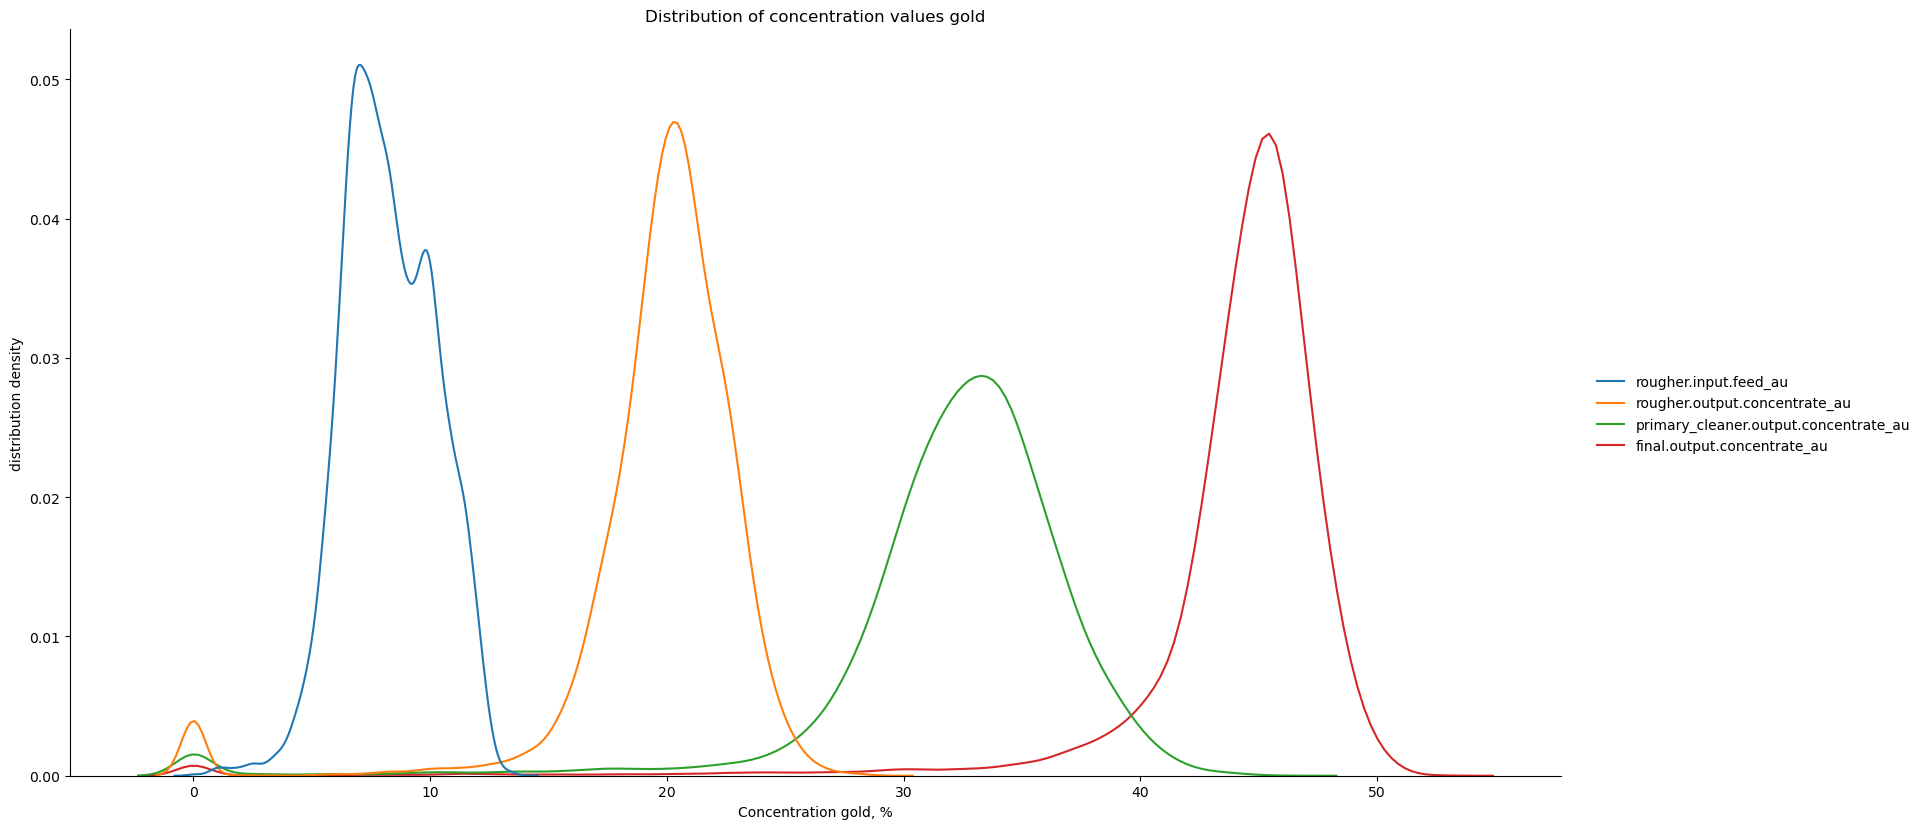

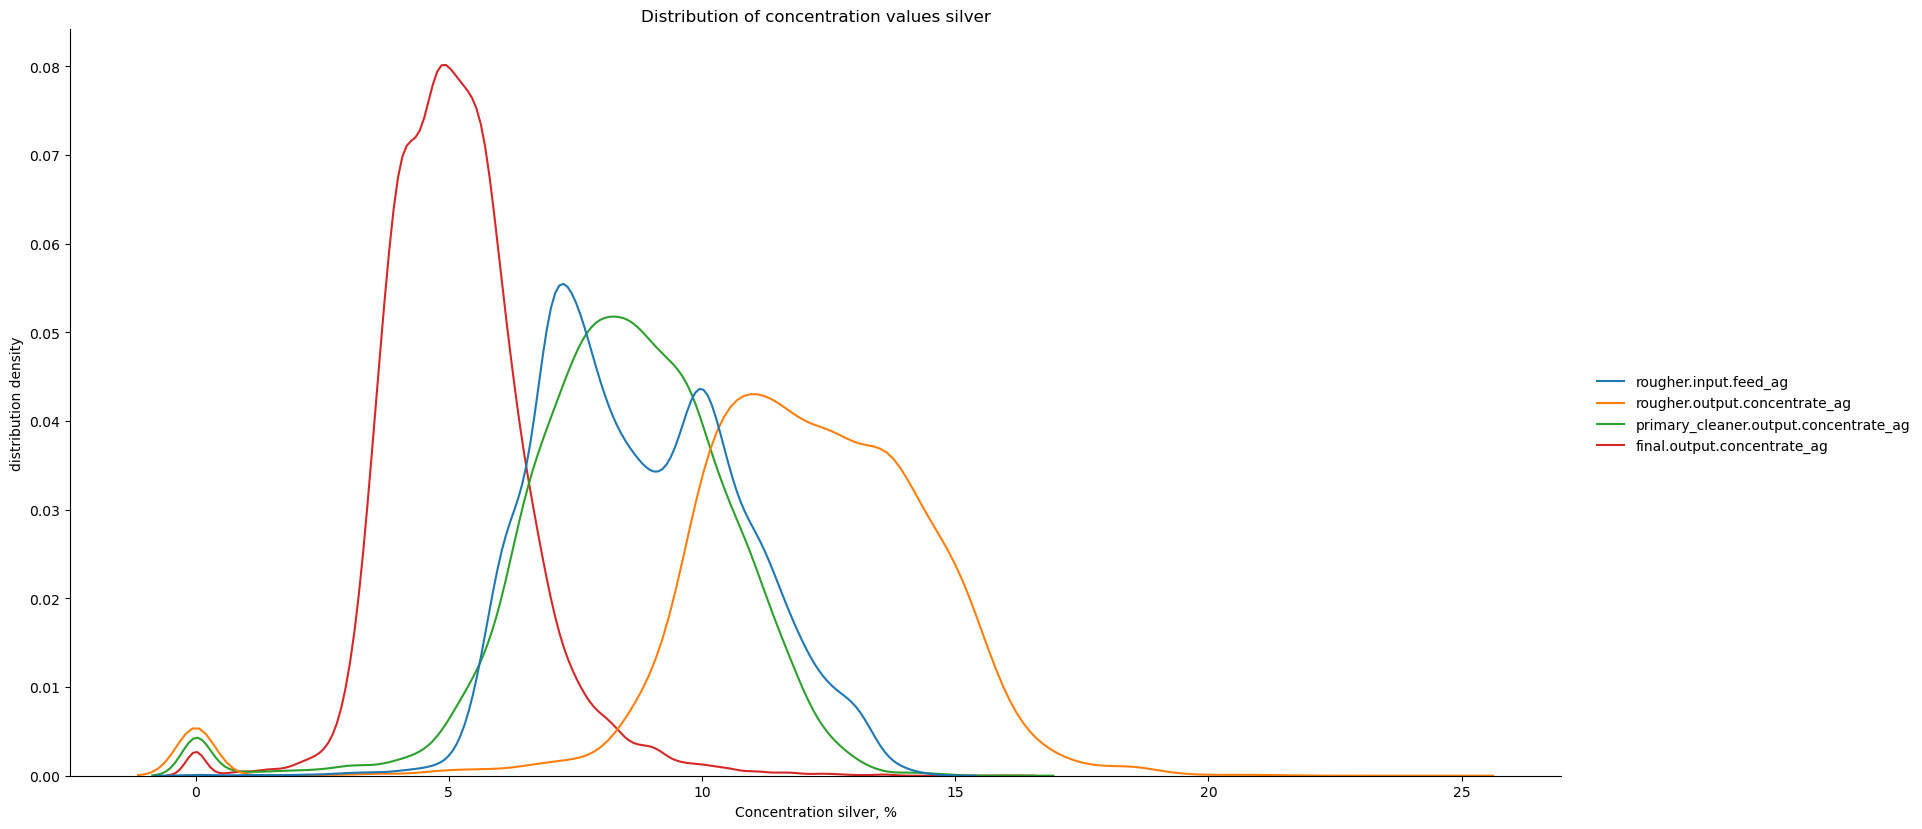

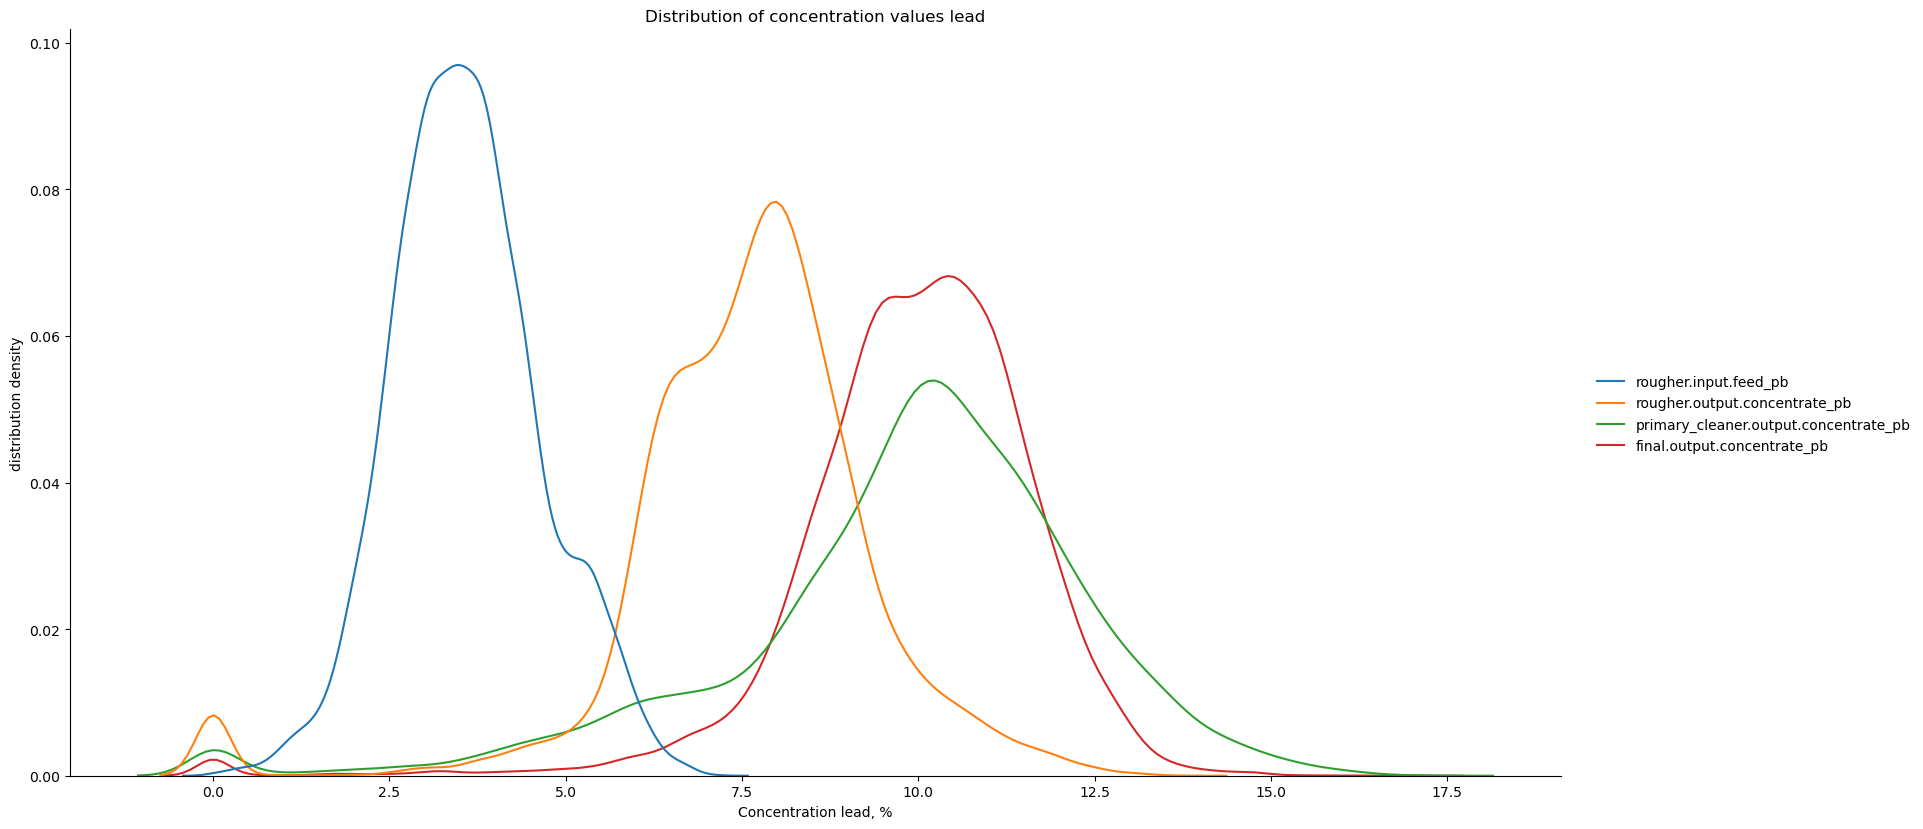

In [8]:
#let's study how the concentration of metals (Au, Ag, Pb) changes at different stages
metals=[('au','gold'),('ag','silver'),('pb','lead')]
concentrate = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']

for metal in metals:
    m=[]
    for stage in concentrate:
        m.append(data[stage +'_' +metal[0]])
    sns.displot(m, kind="kde", height=8,aspect=2)
    plt.title('Distribution of concentration values '+metal[1])
    plt.xlabel('Concentration '+metal[1]+', %')
    plt.ylabel('distribution density')
    plt.show();

Zero values are anomalous, let's remove them from the training set

In [9]:
# replace the zeros in these columns with blanks
for metal in metals:
    for stage in concentrate:
        data_train[stage +'_' +metal[0]] = data_train[stage +'_' +metal[0]].replace(0, np.nan)

#delete the lines with the resulting gaps   
data_train = data_train.dropna(how='any', axis=0)

The concentration of gold will gradually increase during the beneficiation process, unlike other metals: the concentration of silver increases slightly after the flotation stage, but with further purification it falls, becoming less than the initial one; The lead concentration increases during the first two purification stages, but the enrichment efficiency is significantly lower than gold enrichment.

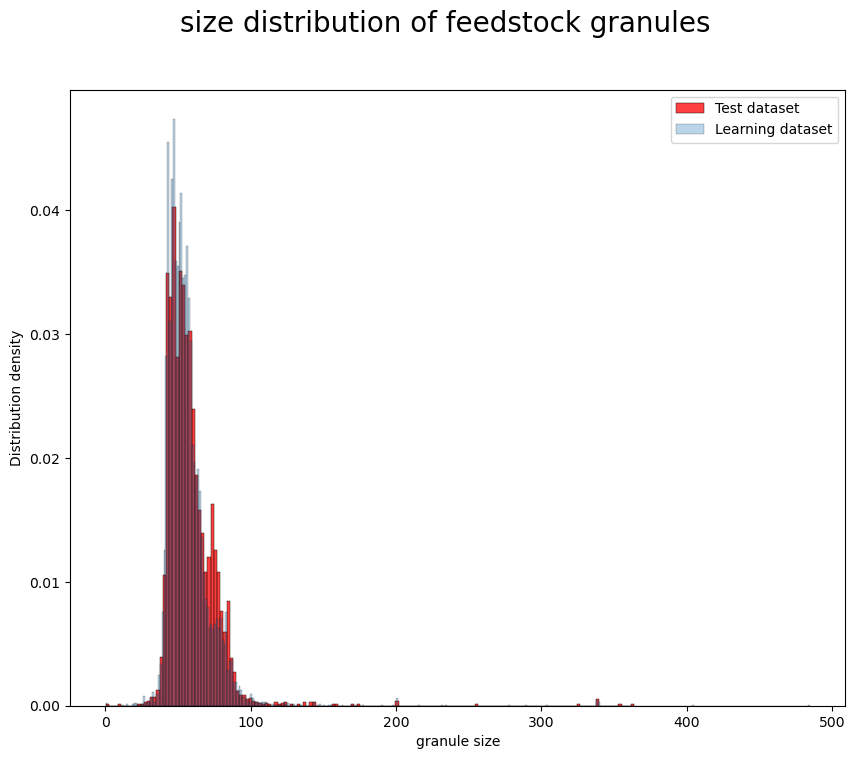

In [10]:
#let's study the size distributions of raw material granules on training and test samples.
plt.figure(figsize=(10,8))
plt.suptitle('size distribution of feedstock granules', fontsize=20)
sns.histplot(data_test['rougher.input.feed_size'],stat='density',color='red',label='Test dataset').set_ylabel('Distribution density', fontsize=10)
sns.histplot(data_train['rougher.input.feed_size'],stat='density',alpha=0.3, label='Learning dataset')
plt.xlabel('granule size')
plt.legend()
plt.show();

The granule size distributions differ slightly; the samples can be used in their original form.

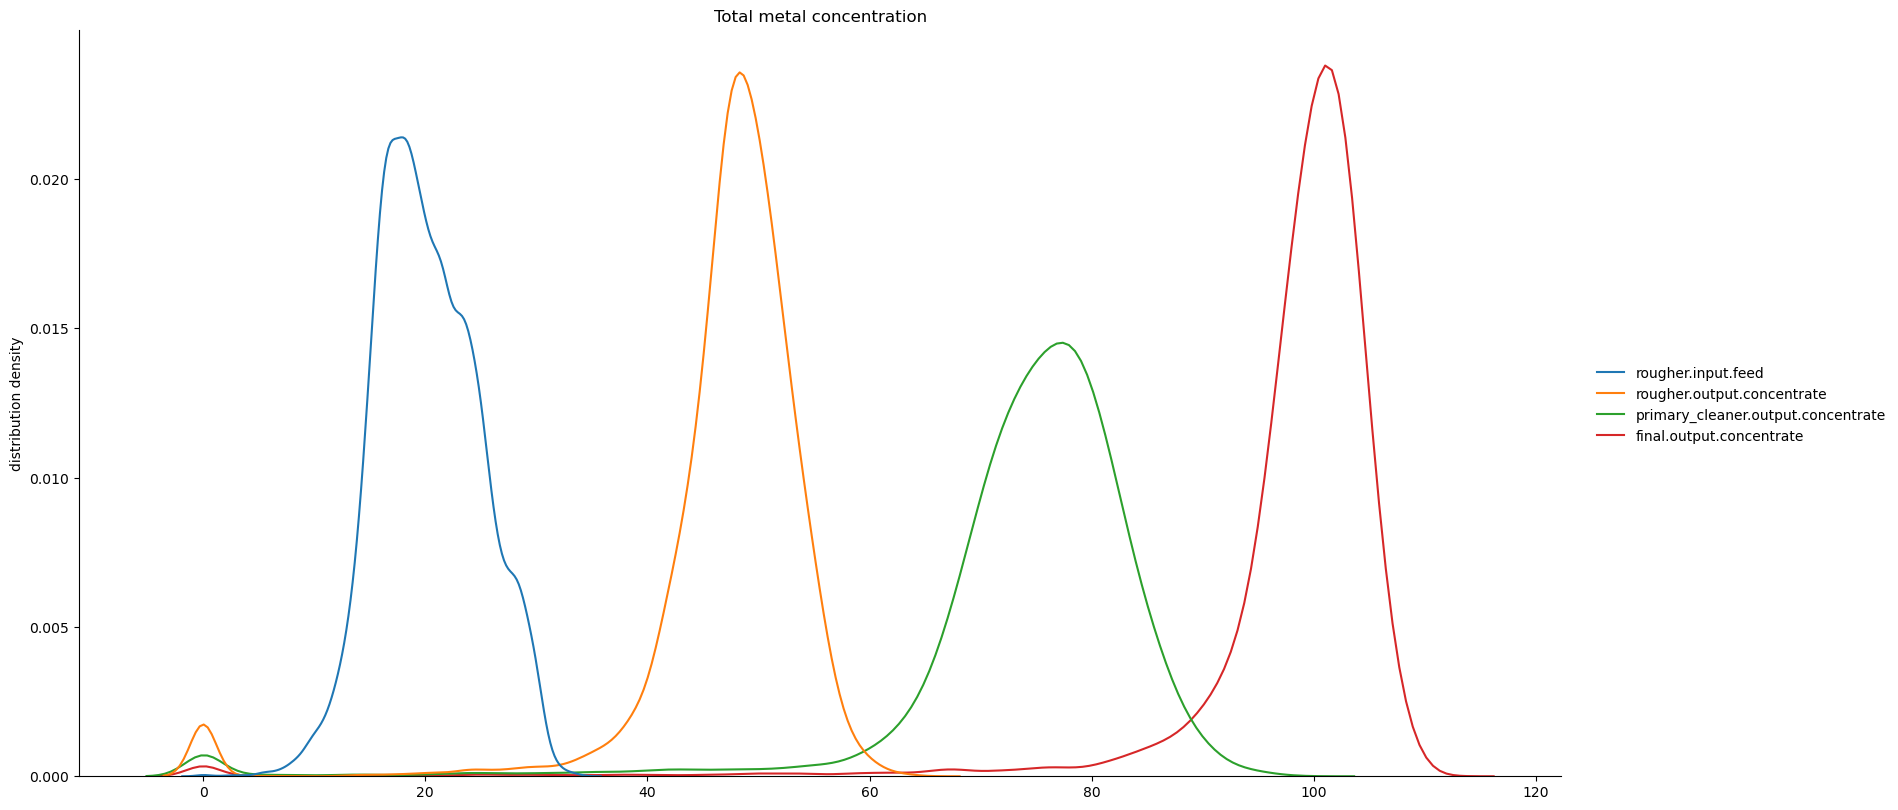

In [11]:
#We study the total concentration of metals at different stages
total_metal=[]

for stage in concentrate:
    data[stage]=data[stage +'_' +'au']+data[stage +'_' +'au']+data[stage +'_' +'pb']
    total_metal.append(data[stage])
sns.displot(total_metal, kind="kde", height=8,aspect=2)
plt.title('Total metal concentration')
plt.ylabel('distribution density')
plt.show()


The total concentration of metals consistently increases during purification.

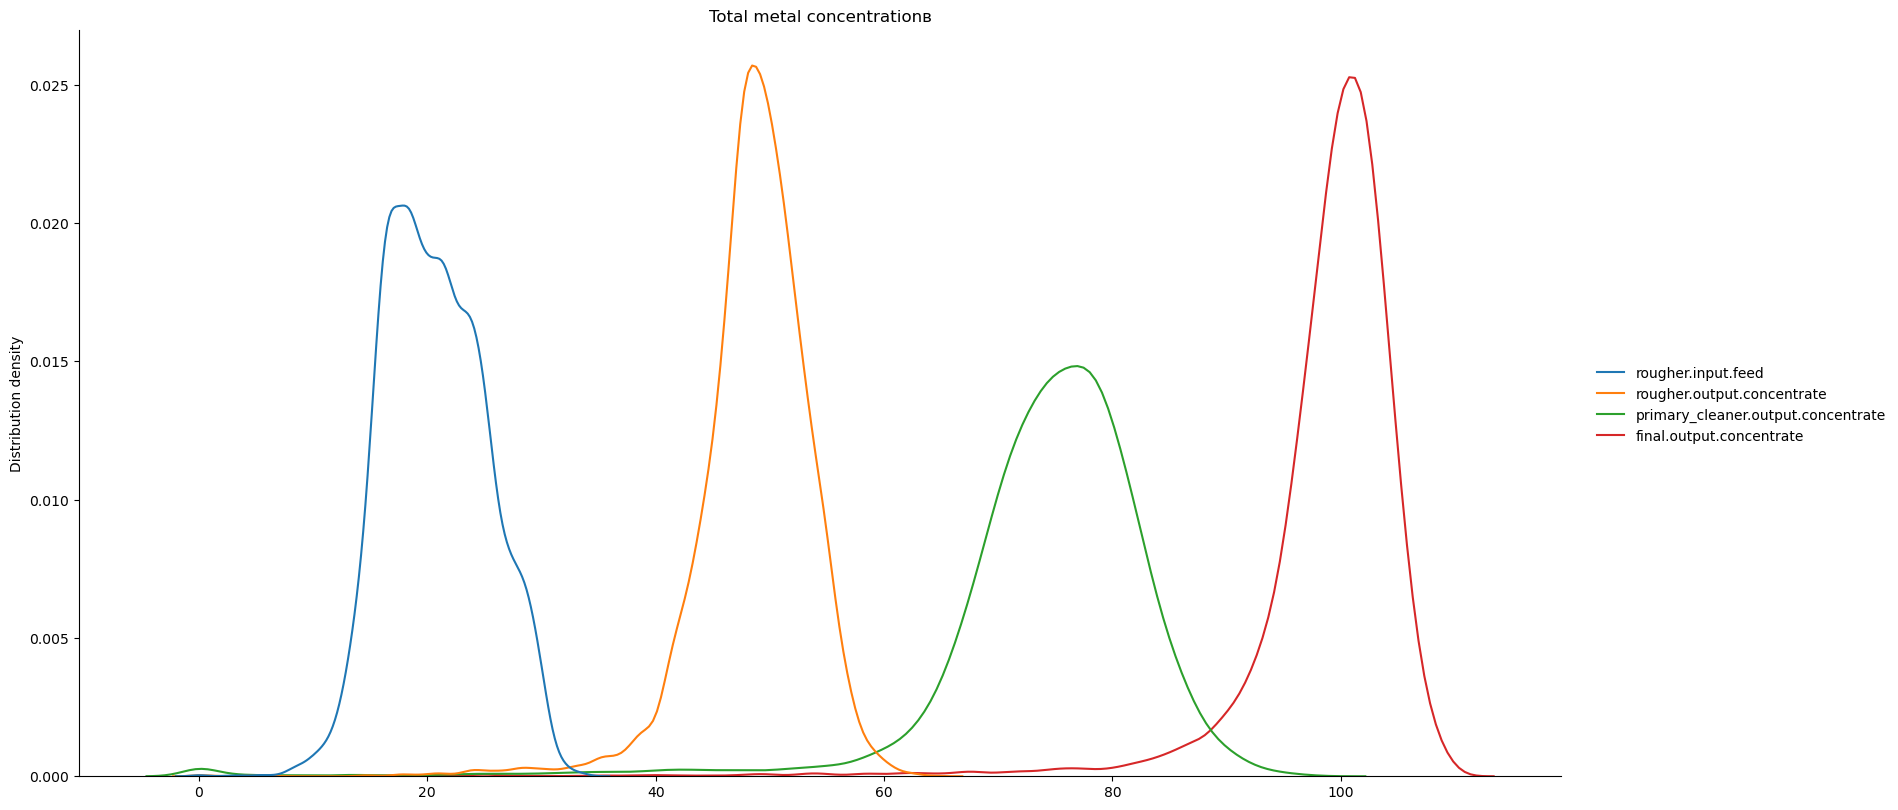

In [12]:
#Let's check the total concentration of metals in the training set
total_metal=[]

for stage in concentrate:
    data_train[stage]=data_train[stage +'_' +'au']+data_train[stage +'_' +'au']+data_train[stage +'_' +'pb']
    total_metal.append(data_train[stage])
sns.displot(total_metal, kind="kde", height=8,aspect=2)
plt.title('Total metal concentrationв')
plt.ylabel('Distribution density')
plt.show()

Anomalous values in the training set are removed

At this stage, the original data has been processed: omissions and anomalous values have been removed. It has been shown that the total concentration of metals consistently increases during purification; gold enrichment is more efficient than the enrichment of other metals.

## Model

In [13]:
#function for sMAPE calculation
def smape(y_target, y_pred):
    return ((1/len(y_target)) * sum(2 * abs(y_target - y_pred) / (abs(y_target) + abs(y_pred)))) * 100
#function for weighted sMAPE calculation
def final_smape(smape_rougher,smape_cleaner):
    smape=0.25*smape_rougher+0.75*smape_cleaner
    return smape

At this stage, the original data has been processed: omissions and anomalous values have been removed.

In [14]:
#Remove the date columns, they have no predictive value
#data_test.drop(['date'], axis=1, inplace=True)
#data_train.drop(['date'], axis=1, inplace=True)

In [15]:
#let's create a dataset from the training sample with the same characteristics as in the test one
data_train_input = data_train[data_test.columns]
#create a test dataset with target features, adding data from the full dataset to it
data_test_targets=data_test.merge(data,on='date')

#separate the data for preliminary cleaning and final cleaning, highlight the target features
rougher = data_train_input.columns.str.contains('rougher')
data_train_rougher = data_train_input.loc[:, rougher]
data_test_rougher = data_test.loc[:, rougher]
target_rougher = data_train['rougher.output.recovery']

target_rougher_test=data_test_targets['rougher.output.recovery']
cleaner = data_train_input.columns.str.contains('cleaner')
data_train_cleaner = data_train_input.loc[:, cleaner]
data_test_cleaner = data_test.loc[:, cleaner]
target_cleaner = data_train['final.output.recovery']
target_cleaner_test=data_test_targets['final.output.recovery']

In [16]:
#scaling the features
scaler = StandardScaler() 
pd.options.mode.chained_assignment = None
scaler.fit(data_train_rougher) 
data_train_rougher = scaler.transform(data_train_rougher) 
data_test_rougher = scaler.transform(data_test_rougher)
scaler.fit(data_train_cleaner)
data_train_cleaner = scaler.transform(data_train_cleaner)
data_test_cleaner = scaler.transform(data_test_cleaner)

In [17]:
#cretae sMAPE scorer
scorer=make_scorer(smape, greater_is_better=False)
#train linear regression and random forest models
#linear regression
model = LinearRegression()
scores=cross_val_score(model, data_train_rougher, target_rougher, scoring=scorer,cv=5)
final_score_rougher=scores.sum()/len(scores)
scores=cross_val_score(model, data_train_cleaner, target_cleaner, scoring=scorer,cv=5)
final_score_cleaner=scores.sum()/len(scores)


print("Quality of linear regression model for flotation stage:",abs(final_score_rougher))
print("Quality of linear regression model for purification stage:",abs(final_score_cleaner))

Quality of linear regression model for flotation stage: 6.1325097050608175
Quality of linear regression model for purification stage: 8.194175399968554


In [18]:
#random forest
# optimization of hyperparameters for the Flotation stage
best_score_rougher = 10
best_depth = 0
best_est = 0
for depth in range(1, 6, 1):
    for est in range(51, 151, 50):
        model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
        scores=cross_val_score(model, data_train_rougher, target_rougher, scoring=scorer, cv=5)
        final_score_rougher=abs(scores.sum())/len(scores)

        
        if final_score_rougher < best_score_rougher:
            best_score_rougher = final_score_rougher
            best_depth = depth
            best_est = est
print("Quality of the random forest model for the flotation stage:",best_score_rougher)
print(best_depth)
print(best_est)

Quality of the random forest model for the flotation stage: 5.412619822548621
5
101


In [19]:
#random forest
# optimization of hyperparameters for the Purification stage
best_score_cleaner = 10
best_depth = 0
best_est = 0
for depth in range(1, 6, 1):
    for est in range(51, 151, 50):
        model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
        scores=cross_val_score(model, data_train_cleaner, target_cleaner, scoring=scorer, cv=5)
        final_score_cleaner=abs(scores.sum())/len(scores)

        
        if final_score_cleaner < best_score_cleaner:
            best_score_cleaner = final_score_cleaner
            best_depth = depth
            best_est = est
print("Quality of the random forest model for the purification stage:",best_score_cleaner)
print(best_depth)
print(best_est)

Quality of the random forest model for the purification stage: 7.967787349486153
2
51


Conclusion: The best model quality (sMAPE) at both stages was obtained for random forest models

In [20]:
#Let's test the best models on a test sample
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=12345)
model.fit(data_train_rougher, target_rougher)
predicted_rougher = model.predict(data_test_rougher)
smape_rougher=smape(target_rougher_test,predicted_rougher)
model = RandomForestRegressor(n_estimators=50, max_depth=2, random_state=12345)
model.fit(data_train_cleaner, target_cleaner)
predicted_cleaner = model.predict(data_test_cleaner)
smape_cleaner=smape(target_cleaner_test,predicted_cleaner)
smape_final=final_smape(smape_rougher,smape_cleaner)
print("SMAPE for Flotation stage:",smape_rougher)
print("SMAPE for purification stage:",smape_cleaner)
print("final SMAPE for test dataset:",smape_final)

SMAPE for Flotation stage: 3.763336142517611
SMAPE for purification stage: 8.16414097499661
final SMAPE for test dataset: 7.06393976687686


In [21]:
#check the models for adequacy
model = DummyRegressor()
model.fit(data_train_rougher, target_rougher) 
predicted_rougher = model.predict(data_test_rougher) 
dummy_smape_rougher=smape(target_rougher_test,predicted_rougher)
model.fit(data_train_cleaner, target_cleaner) 
predicted_cleaner = model.predict(data_test_cleaner) 
dummy_smape_cleaner=smape(target_cleaner_test,predicted_cleaner)
smape_final=final_smape(dummy_smape_rougher,dummy_smape_cleaner)
print("SMAPE dummy-models for the flotation stage:", dummy_smape_rougher)
print("SMAPE dummy-models for the purification stage:", dummy_smape_cleaner)
print("final SMAPE dummy-модели for test dataset:",smape_final)

SMAPE dummy-models for the flotation stage: 6.050180405008701
SMAPE dummy-models for the purification stage: 9.033136019780768
final SMAPE dummy-модели for test dataset: 8.287397116087751


Conclusion: the best model quality and the best results (smallest sMAPE) for all purification stages were obtained for random forest models, the final SMAPE on the test set: 7.063904419267051. The sMAPE value of the resulting model for all stages is lower than the SMAPE of the dummy model, which shows the adequacy of the model.

During the project, the original data was processed: omissions and anomalous values were removed. Various models for predicting enrichment efficiency have been studied.
Conclusion: the best quality of the model and the best results (smallest sMAPE) for the flotation stage were obtained for the random forest model, and for the final purification stage for the linear regression model, the final SMAPE on the test sample: 6.3773539526626655. The sMAPE value of the resulting model for all stages is lower than the SMAPE of the dummy model, which shows the adequacy of the model.